In [73]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [75]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

In [76]:
## Load measurement data
maindir = Path.cwd() / "tutorial_data/"
data = maindir / "Sphere_data.csv"
df = pd.read_csv(data, sep=',', header=0)
df

,Rnom,Xnom,Ynom,Znom,R,X,Y,Z,Nx,Ny,...,DirectionDensity,ExposureTime,oriX,oriY,oriZ,Inc,ang,ViewAng,Rs,PointDev
0,8.00130,-5.186012,-3.672416,4.862041,7.947929,-5.151420,-3.647920,4.82961,-0.639832,-0.448649,...,10,0.6,-0.639913,-0.449879,1.623961,2.245372,2.245371,-0.758882,85.137959,-0.053371
1,8.00130,1.865099,-1.576667,7.619470,8.002077,1.865280,-1.576820,7.62021,0.234097,-0.202082,...,10,0.6,0.234015,-0.203311,1.950978,2.827924,2.827923,-0.940730,82.380530,0.000777
2,8.00130,-1.993943,-1.865494,7.520966,7.979538,-1.988520,-1.860420,7.50051,-0.244240,-0.206107,...,10,0.6,-0.244322,-0.207336,1.947557,2.817157,2.817157,-0.939509,82.479034,-0.021762
3,8.00130,0.482676,3.214214,7.311406,7.966614,0.480584,3.200280,7.27971,0.092929,0.421877,...,10,0.6,0.092848,0.420648,1.901877,2.693675,2.693675,-0.617323,82.688594,-0.034686
4,8.00130,5.470189,2.896799,5.070146,7.975835,5.452780,2.887580,5.05401,0.682910,0.355493,...,10,0.6,0.682828,0.354263,1.638168,2.262273,2.262273,-0.411251,84.929854,-0.025465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,15.00425,10.166875,8.333547,7.232853,14.960161,10.137000,8.309060,7.21160,0.679505,0.555302,...,5,1.0,0.679423,0.554073,1.479491,2.070031,4.213155,-0.179877,82.767147,-0.044089
4046,15.00425,1.907981,-0.768472,14.862590,14.945102,1.900460,-0.765443,14.80400,0.153036,-0.065725,...,5,1.0,0.152955,-0.066955,1.986032,2.974666,2.974667,-0.910991,75.137410,-0.059148
4047,15.00425,3.328417,10.136954,10.549471,14.989073,3.325050,10.126700,10.53880,0.225904,0.674502,...,5,1.0,0.225822,0.673273,1.702861,2.349017,2.349017,-0.326214,79.450529,-0.015177
4048,15.00425,6.578290,-6.326970,11.908949,14.973824,6.564950,-6.314140,11.88480,0.445781,-0.414212,...,5,1.0,0.445699,-0.415441,1.793541,2.488180,2.488180,-0.894987,78.091051,-0.030426


In [77]:
## randomization settings
seed_num = 42
np.random.seed(seed_num)

In [78]:
df.columns

Index(['Rnom', 'Xnom', 'Ynom', 'Znom', 'R', 'X', 'Y', 'Z', 'Nx', 'Ny', 'Nz',
       'I', 'J', 'K', 'LateralDensity', 'DirectionDensity', 'ExposureTime',
       'oriX', 'oriY', 'oriZ', 'Inc', 'ang', 'ViewAng', 'Rs', 'PointDev'],
      dtype='object')

In [79]:
## select input features, target variable fro dataframe columns
feature_names = ['Nx', 'Ny', 'Nz', 'I', 'J', 'K', 
       'LateralDensity', 'DirectionDensity', 'ExposureTime',
       'oriX', 'oriY', 'oriZ', 'Inc', 'ang', 'ViewAng', 'Rs']
target_variable = 'PointDev'

In [80]:
## Scale features & target to [0, 1] interval
Xall = df[feature_names].values
Yall = df[target_variable].values.reshape(-1, 1)
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
scalerX.fit(Xall)
scalerY.fit(Yall)

Xsc = scalerX.transform(Xall)
Ysc = scalerY.transform(Yall)

In [81]:
## Split data into train & test partitions
X_train, X_test, y_train, y_test = train_test_split(Xsc, Ysc, test_size=0.33, random_state=seed_num)

In [82]:
## instantiate regressors
# svm = SVR()

# dtree = DecisionTreeRegressor()

mlp = MLPRegressor(hidden_layer_sizes=[128, 64, 32])

# rfrst = RandomForestRegressor()

# gbr = GradientBoostingRegressor()

In [83]:
## Select performance scores
scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

In [84]:
## Select hyper-parameters & build model
# hparams = {'tol': 0.001, 'max_iter': 20000, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.01, 
#           'degree': 2, 'coef0': 0.0, 'C': 10.0}

model = mlp

In [85]:
## Train model on the train partition, predict on the test partition
trained_model = model.fit(X_train, y_train.ravel())
predictions = trained_model.predict(X_test)

In [86]:
## Compute performance scores on the unseen test partition
mae = metrics.mean_absolute_error(y_test.ravel(), predictions)
mape = metrics.mean_absolute_percentage_error(y_test.ravel(), predictions)

In [87]:
mae

0.07664753394882659

In [88]:
## Load Complete Point Cloud to perform inference
filename = "Processed_Sphere_16.0026_75_5_0.8.csv"
filepath = maindir / filename
sdf = pd.read_csv(filepath, sep=',', header=0)
sdf

,Rnom,Xnom,Ynom,Znom,R,X,Y,Z,Nx,Ny,...,DirectionDensity,ExposureTime,oriX,oriY,oriZ,Inc,ang,ViewAng,Rs,PointDev
0,8.0013,-2.632224,-3.840299,6.507250,7.988217,-2.627920,-3.834020,6.49661,-0.325319,-0.481172,...,5,0.8,-0.325400,-0.482402,1.814027,2.522913,2.522914,-0.943355,83.492750,-0.013083
1,8.0013,-7.183528,-0.844821,3.421112,7.947270,-7.135020,-0.839116,3.39801,-0.883488,-0.094657,...,5,0.8,-0.883570,-0.095886,1.458789,2.047641,2.047641,-0.452648,86.578888,-0.054030
2,8.0013,-7.228272,-0.844885,3.325515,7.946670,-7.178920,-0.839116,3.30281,-0.886701,-0.091488,...,5,0.8,-0.886782,-0.092718,1.453200,2.041356,2.041356,-0.446232,86.674485,-0.054630
3,8.0013,-0.214186,-0.108004,7.997703,7.979997,-0.213616,-0.107716,7.97641,-0.035267,-0.025988,...,5,0.8,-0.035348,-0.027217,1.999039,3.098555,3.098555,-0.904832,82.002297,-0.021303
4,8.0013,-0.252690,-0.107862,7.996581,7.983118,-0.252116,-0.107617,7.97841,-0.039487,-0.033889,...,5,0.8,-0.039568,-0.035118,1.998644,3.090389,3.090389,-0.908019,82.003419,-0.018182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26710,8.0013,6.765618,1.065539,4.136645,7.956551,6.727780,1.059580,4.11351,0.848142,0.132445,...,5,0.8,0.848060,0.131215,1.512945,2.109139,2.109139,-0.399204,85.863355,-0.044749
26711,8.0013,6.719284,1.065265,4.211560,7.960928,6.685380,1.059890,4.19031,0.841908,0.132128,...,5,0.8,0.841827,0.130899,1.523194,2.121120,2.121121,-0.408509,85.788440,-0.040372
26712,8.0013,6.662503,1.063948,4.301148,7.972210,6.638280,1.060080,4.28551,0.834902,0.131533,...,5,0.8,0.834820,0.130304,1.534450,2.134382,2.134382,-0.418840,85.698852,-0.029090
26713,8.0013,6.612648,1.063124,4.377609,7.980648,6.595580,1.060380,4.36631,0.827524,0.128876,...,5,0.8,0.827442,0.127647,1.546438,2.148632,2.148632,-0.430748,85.622391,-0.020652


In [89]:
## Perform inference
x = sdf[feature_names].values
xsc = scalerX.transform(x)
y = sdf[target_variable].values.reshape(-1, 1)
ys = scalerY.transform(y)
predictions = trained_model.predict(xsc).reshape(-1, 1)
predictions = scalerY.inverse_transform(predictions)
sdf['predictions'] = predictions

In [90]:
sdf

,Rnom,Xnom,Ynom,Znom,R,X,Y,Z,Nx,Ny,...,ExposureTime,oriX,oriY,oriZ,Inc,ang,ViewAng,Rs,PointDev,predictions
0,8.0013,-2.632224,-3.840299,6.507250,7.988217,-2.627920,-3.834020,6.49661,-0.325319,-0.481172,...,0.8,-0.325400,-0.482402,1.814027,2.522913,2.522914,-0.943355,83.492750,-0.013083,-0.012015
1,8.0013,-7.183528,-0.844821,3.421112,7.947270,-7.135020,-0.839116,3.39801,-0.883488,-0.094657,...,0.8,-0.883570,-0.095886,1.458789,2.047641,2.047641,-0.452648,86.578888,-0.054030,-0.036128
2,8.0013,-7.228272,-0.844885,3.325515,7.946670,-7.178920,-0.839116,3.30281,-0.886701,-0.091488,...,0.8,-0.886782,-0.092718,1.453200,2.041356,2.041356,-0.446232,86.674485,-0.054630,-0.036065
3,8.0013,-0.214186,-0.108004,7.997703,7.979997,-0.213616,-0.107716,7.97641,-0.035267,-0.025988,...,0.8,-0.035348,-0.027217,1.999039,3.098555,3.098555,-0.904832,82.002297,-0.021303,-0.007224
4,8.0013,-0.252690,-0.107862,7.996581,7.983118,-0.252116,-0.107617,7.97841,-0.039487,-0.033889,...,0.8,-0.039568,-0.035118,1.998644,3.090389,3.090389,-0.908019,82.003419,-0.018182,-0.007453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26710,8.0013,6.765618,1.065539,4.136645,7.956551,6.727780,1.059580,4.11351,0.848142,0.132445,...,0.8,0.848060,0.131215,1.512945,2.109139,2.109139,-0.399204,85.863355,-0.044749,-0.025991
26711,8.0013,6.719284,1.065265,4.211560,7.960928,6.685380,1.059890,4.19031,0.841908,0.132128,...,0.8,0.841827,0.130899,1.523194,2.121120,2.121121,-0.408509,85.788440,-0.040372,-0.025486
26712,8.0013,6.662503,1.063948,4.301148,7.972210,6.638280,1.060080,4.28551,0.834902,0.131533,...,0.8,0.834820,0.130304,1.534450,2.134382,2.134382,-0.418840,85.698852,-0.029090,-0.024937
26713,8.0013,6.612648,1.063124,4.377609,7.980648,6.595580,1.060380,4.36631,0.827524,0.128876,...,0.8,0.827442,0.127647,1.546438,2.148632,2.148632,-0.430748,85.622391,-0.020652,-0.024321


In [91]:
def create_color_mask(row, col='PointDev'):
    pointdev = row[col]
    if (pointdev > 0.05):
        color = 5
    elif (pointdev >= 0.04) & (pointdev < 0.05):
        color = 4
    elif (pointdev >= 0.03) & (pointdev < 0.04):
        color = 3
    elif (pointdev >= 0.02) & (pointdev < 0.03):
        color = 2
    elif (pointdev >= 0.01) & (pointdev < 0.02):
        color = 1
    elif (pointdev > -0.01) & (pointdev < 0.01):
        color = 0
    elif (pointdev <= -0.01) & (pointdev > -0.02):
        color = -1
    elif (pointdev <= -0.02) & (pointdev > -0.03):
        color = -2
    elif (pointdev <= -0.03) & (pointdev > -0.04):
        color = -3
    elif (pointdev <= -0.04) & (pointdev > -0.05):
        color = -4
    elif (pointdev <= -0.05):
        color = -5
        
    return color

In [92]:
## Map values to colormap, for visualization purposes
sdf['color_actual'] = sdf.apply(lambda x: create_color_mask(x, col='PointDev'), axis=1)
sdf['color_predicted'] = sdf.apply(lambda x: create_color_mask(x, col='predictions'), axis=1)
cmap = cm.coolwarm

In [93]:
## Retrieve geometry, diameter & scanning parameters from filename
sparams = filename[:-4].split('_')
geometry = sparams[1]
diameter = float(sparams[2])
lateral_density = int(sparams[3])
direction_density = int(sparams[4])
exposure_time = float(sparams[5])
print('Geometry: ', geometry)
print('Diameter: ', diameter, ' mm')
print('Lateral Density: ', lateral_density)
print('Direction Density: ', direction_density)
print('Exposure Time: ', exposure_time)

Geometry:  Sphere
Diameter:  16.0026  mm
Lateral Density:  75
Direction Density:  5
Exposure Time:  0.8


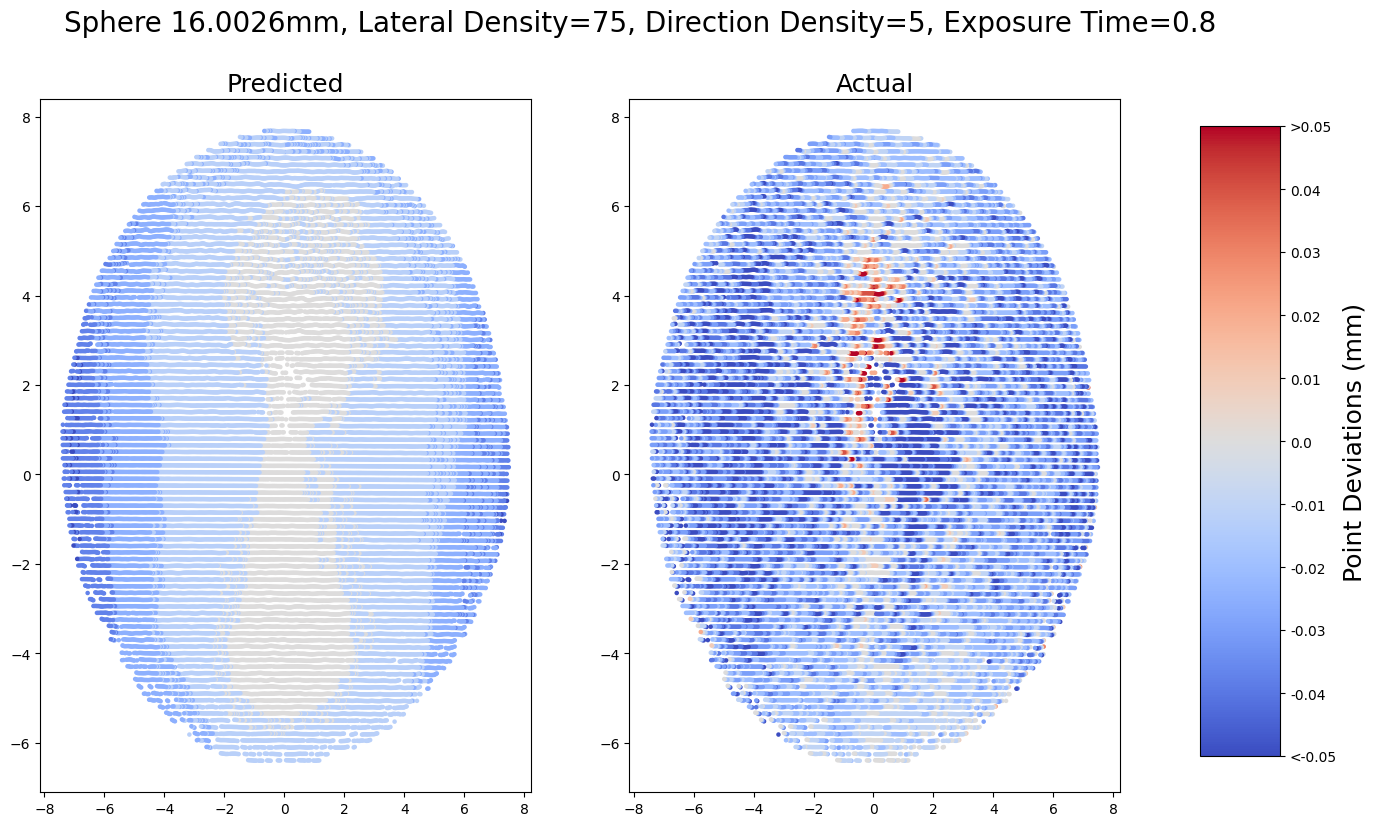

In [95]:
## Create Predicted Point Deviation (error) map and compare to actual values
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))
pc = ax1.scatter(sdf.Xnom.values, sdf.Ynom.values, c=sdf.color_predicted.values, norm=colors.CenteredNorm(), s=5, cmap=cmap)
# fig.colorbar(pc, ax=ax1)
ax1.set_title('Predicted', fontsize=18)

pc = ax2.scatter(sdf.Xnom.values, sdf.Ynom.values, c=sdf.color_actual.values, s=5, norm=colors.CenteredNorm(), cmap=cmap)
# fig.colorbar(pc, ax=ax2)
ax2.set_title('Actual', fontsize=18)
title = '{} {}mm, Lateral Density={}, Direction Density={}, Exposure Time={}'.format(
    geometry, diameter, lateral_density, direction_density, exposure_time)
fig.suptitle(title, fontsize=20)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(pc, cbar_ax, ticks=np.arange(-5, 6, 1))
cbar.ax.set_yticklabels(['<-0.05', '-0.04', '-0.03', '-0.02', '-0.01', '0.0', '0.01', '0.02', '0.03', '0.04', '>0.05'])
cbar.set_label('Point Deviations (mm)', fontsize=18)
nm = '_'.join(['PointDevMap', filename[:-4]])
#     nm = '_'.join(['PointDevMap', name[:-4], 'FaceOn'])
nm += '.png'
savefile = maindir / nm
plt.savefig(savefile, bbox_inches='tight', pad_inches=0.1, format='png')
# plt.close('all')

In [96]:
from sklearn.inspection import PartialDependenceDisplay
import PyALE

In [97]:
print(feature_names)

['Nx', 'Ny', 'Nz', 'I', 'J', 'K', 'LateralDensity', 'DirectionDensity', 'ExposureTime', 'oriX', 'oriY', 'oriZ', 'Inc', 'ang', 'ViewAng', 'Rs']


In [98]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_train_df

,Nx,Ny,Nz,I,J,K,LateralDensity,DirectionDensity,ExposureTime,oriX,oriY,oriZ,Inc,ang,ViewAng,Rs
0,0.147169,0.656865,0.567496,0.0,0.0,0.0,1.0,0.000,0.0,0.147169,0.656865,0.567497,0.372979,0.833365,0.460503,0.728424
1,0.349765,0.783905,0.683193,0.0,0.0,0.0,0.5,0.000,0.0,0.349766,0.783904,0.683193,0.468293,0.237251,0.482760,0.303786
2,0.433380,0.212859,0.856290,0.0,0.0,0.0,0.5,1.000,0.5,0.433380,0.212859,0.856290,0.650259,0.692887,0.005211,0.612253
3,0.184949,0.530677,0.743751,0.0,0.0,0.0,0.5,1.000,0.0,0.184950,0.530677,0.743751,0.525194,0.266079,0.279796,0.664686
4,0.198047,0.143404,0.494484,0.0,0.0,0.0,0.0,1.000,0.0,0.198047,0.143404,0.494484,0.319152,0.161692,0.155675,0.809546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,0.163876,0.764648,0.421943,0.0,0.0,0.0,0.5,0.000,0.5,0.163876,0.764647,0.421943,0.266186,0.887470,0.612138,0.812198
2709,0.436951,0.975149,0.149013,0.0,0.0,0.0,0.5,0.375,0.5,0.436951,0.975149,0.149014,0.089145,0.045164,0.902134,0.942159
2710,0.156125,0.441641,0.704467,0.0,0.0,0.0,0.0,0.375,1.0,0.156125,0.441641,0.704468,0.488403,0.247440,0.241438,0.679996
2711,0.779423,0.475029,0.794424,0.0,0.0,0.0,0.0,0.375,0.5,0.779423,0.475029,0.794423,0.577048,0.292350,0.214909,0.162604


PyALE._ALE_generic:INFO: Discrete feature detected.


LateralDensity


/home/givasile/github/presentations/xmanai-grapes-lab/env/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/givasile/github/presentations/xmanai-grapes-lab/env/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/home/givasile/github/presentations/xmanai-grapes-lab/env/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


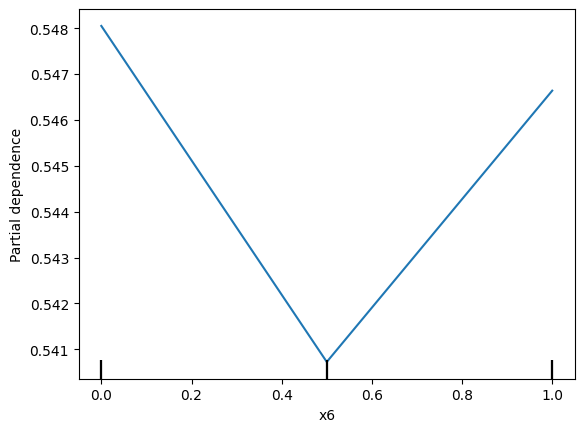

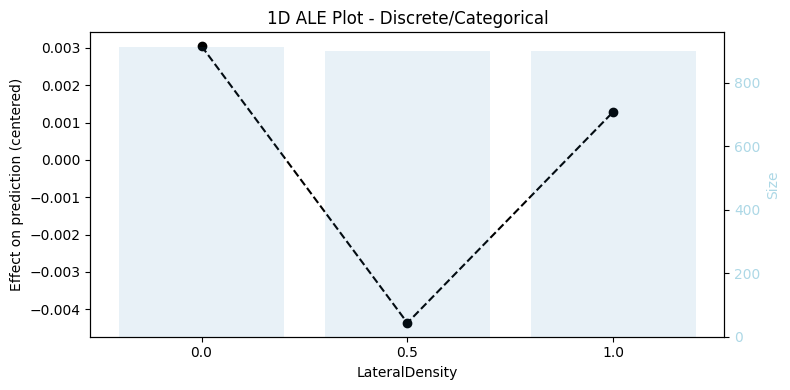

In [103]:
i = 6
features = [i]
feature_name = feature_names[i]
PartialDependenceDisplay.from_estimator(trained_model, X_train, [i])
print(feature_name)
_ = PyALE.ale(X=X_train_df, model=trained_model, feature=[feature_name], grid_size=50, include_CI=False)

In [104]:
model.predict(X_train)

array([0.53130085, 0.52097836, 0.6056232 , ..., 0.52791682, 0.51415823,
       0.53414028])